I was unable to really get the code working and since the Hough transform on its own is more of an intuitive understanding thing as opposed to something I necessarily need to show via a demo, so although I think the output is a bit weird and I can't fix it, I'll just keep it where it's at. Most of this code is from GPT (just because I did not feel like implementing the annoying parts of this algorithm such as the conversion to parmeter-space, and creating an accumulator array to figure out which "intersections" are most likely to be edges. Although this algorithm is obviously historically **extremely** relevant (particularly in vision techniques from the '60s to the '90s), it's usage has waned in modern computer vision and its importance is slowly becoming smaller and smaller with the advent of deep learning and techniques like that. Please keep that in mind when reading this.

In [23]:
#importing the correct modules
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# picking the image path
image_path = os.path.abspath("./images/lebronslam.jpg")

# loading the image
image = cv2.imread(image_path)
if image is None:
    print(f'Error: Image not found at {image_path}')
    exit()

# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In the below section, we are simply running the Hough transform as per the second implementation briefly mentioned in the notes. Instead of using the slope of a given line as part of the conversion to parameter space, we instead utilize a rho/theta (radius/angle) approach in order to eliminate the possibility of the slope being too big or too small. The arguments for the function HoughLines which solely detects lines (there are similar functions to run for circles -- *cv2.HoughCircles(...)* -- and other functions for the Generalized Hough Transform) are listed in a comment in the below codeblock.

In [24]:
# Perform Hough Transform to detect lines

#cv2.HoughLines(image, rho - details the granularity of the accumulator matrix, theta - same as rho, threshold - when to mark something a line)
lines = cv2.HoughLines(gray, rho=1, theta=np.pi/180, threshold=2000)

#play around with threshold value -- values up until 5000 will show some amount of red in the final photo while values underneath 500 pretty much 
#make the entire image red

This will draw the detected lines based on the threshold on the images. This particular part of the code is where things are going wrong in this implementation because there are too many lines. It's simply just iterating through the list of lines produced by the Hough transform and drawing them on top of the image.

In [25]:
# Draw detected lines on a copy of the original image
image_with_lines = image.copy()
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

This is simply the code to prepare the images and show the outputs of the transform.

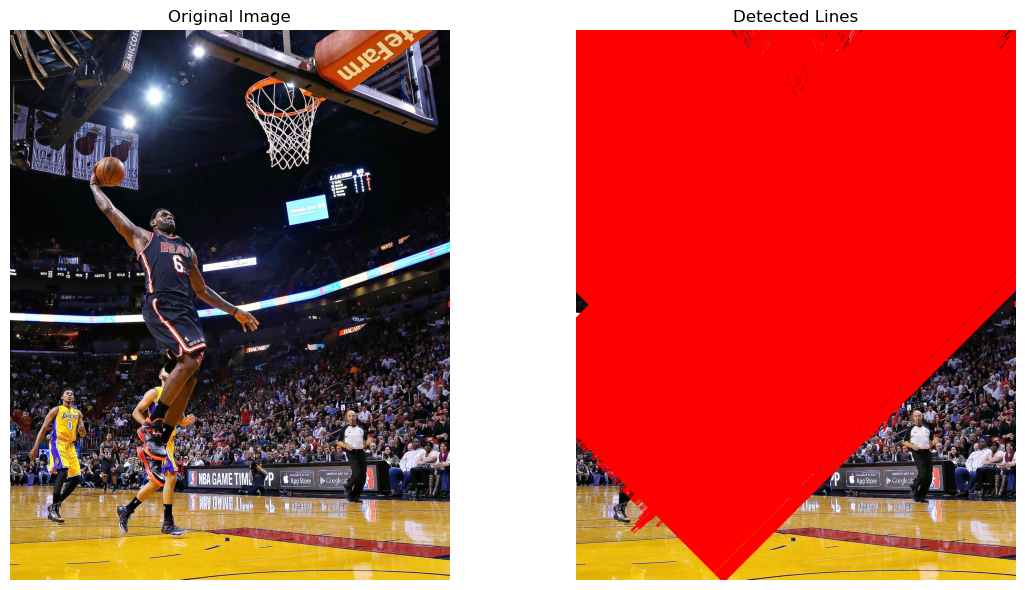

In [26]:
# Display the initial and processed images side by side using matplotlib
plt.figure(figsize=(12, 6))

# Show the initial image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Show the image with detected lines
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines')
plt.axis('off')

plt.tight_layout()
plt.show()